### Linear Regression

This notebook demonstrates the implementation of the linear regression algorithm **built in the supervised learning package**. For a description of the background behind linear regression, see **this README**.

This notebook **contains several sections - list**. **The preprocessing (data loading and cleaning) is shared with logistic regression**

### Library Imports
This section imports the libraries **and modules** required to run logistic regression. The **following dependencies are required**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rice_ml.preprocess import *
from rice_ml.supervised_learning.regression import *
from rice_ml.postprocess.regressionpost import *
import sklearn

### Data Loading & Cleaning
The data used in this notebook comes from **THIS IS NOT TRUE**

In [27]:
cancer_data = sklearn.datasets.load_breast_cancer(as_frame = True)
cancer_data = cancer_data.frame
display(cancer_data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


To ensure that the dataset does not contain missing data, we apply a series of preprocessing **algorithms**, including dropping any rows with missing values or that are identified to be duplicates of another.

In [28]:
cancer_data_missing = missing_data(cancer_data, 'drop')
cancer_data_cleaned = duplicate_identify(cancer_data_missing, True)

We then **split the data into the target variable and the other features**. In this example, we would like to predict the concavity of the tumor given the perimeter, so **concavity is our target variable and perimeter is the other feature**.

In [29]:
cancer_perimeter = cancer_data_cleaned[:, 2].reshape(-1, 1)
cancer_concavity = cancer_data_cleaned[:, 6]
print(f"Array for perimeter (first five entries): \n {cancer_perimeter[0:5]} \n \n \
Array for concavity (first five rows): \n {cancer_concavity[0:5]}")

Array for perimeter (first five entries): 
 [[122.8 ]
 [132.9 ]
 [130.  ]
 [ 77.58]
 [135.1 ]] 
 
 Array for concavity (first five rows): 
 [0.3001 0.0869 0.1974 0.2414 0.198 ]


### Data Visualization

To better understand the **distribution of features** and their relation to the status of breast cancer, we can visualize the relationships between them using **both plots and a correlation matrix**. The correlation matrix indicates how closely correlated each pair of variables is, which aids in the decision of which to include in a logistic regression.

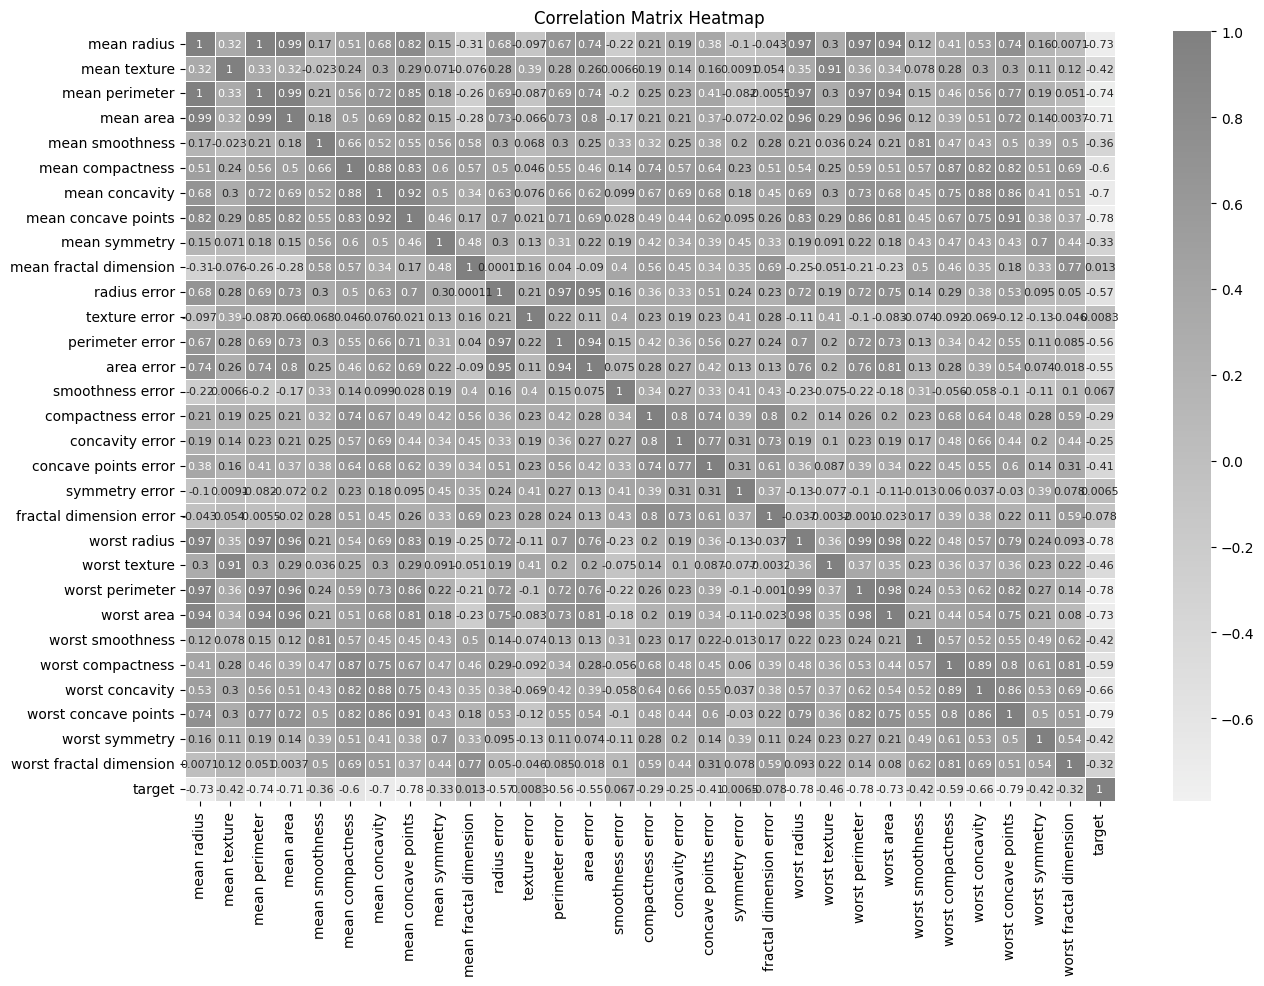

In [30]:
# Creating and plotting a correlation matrix with a heatmap
correlation_matrix = (pd.DataFrame(cancer_data_cleaned, columns = cancer_data.columns)).corr()
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, annot_kws={"size": 8}, cmap = sns.light_palette('gray', as_cmap=True), linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

The target feature (mean concavity) is correlated with the mean perimeter, so this is likely a suitable relationship for linear regression. **relationship/visualization**

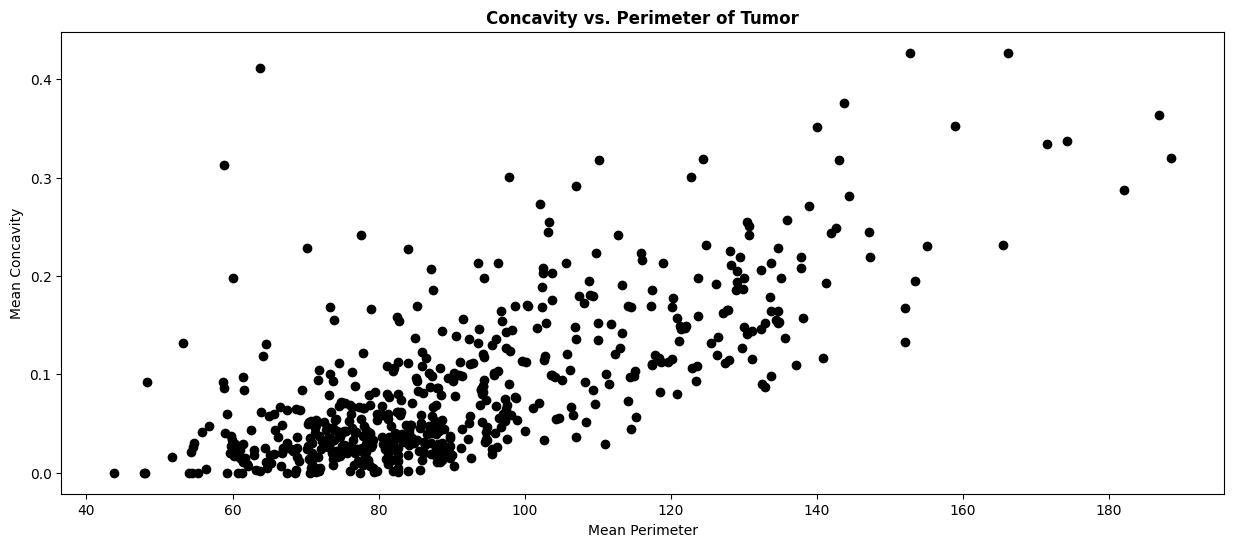

In [31]:
# Plotting mean perimeter and concavity, color-coded by target
plt.figure(figsize = (15, 6))
plt.scatter(cancer_perimeter, cancer_concavity, color = 'black')    
plt.title("Concavity vs. Perimeter of Tumor", fontweight = 'bold')
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Concavity")
plt.show()

### Linear Regression Implementation (1 Feature)

This section **implements a basic linear regression algorithm for the tonewo identified features to attempt to predict concavity**. **elaborate!!** 
**we standardize to avoid overflow**. **test vs. training arrays**

In [32]:
# Standardizing the data
cancer_perimeter_normal = z_score_standardize(cancer_perimeter)
print(f"Standardized feature data (first five rows): \n {cancer_perimeter_normal[0:5, :]}")

Standardized feature data (first five rows): 
 [[ 1.26993369]
 [ 1.68595471]
 [ 1.56650313]
 [-0.59268717]
 [ 1.77657315]]


In [33]:
# Splitting the data into training and testing arrays
train_array, test_array, train_targets, test_targets = train_test(cancer_perimeter_normal, cancer_concavity)

# Verifying sizes of each array
print(f"Shape of training array: {train_array.shape}")
print(f"Shape of training targets: {train_targets.shape}")
print(f"Shape of testing array: {test_array.shape}")
print(f"Shape of testing targets: {test_targets.shape}")

Shape of training array: (398, 1)
Shape of training targets: (398,)
Shape of testing array: (171, 1)
Shape of testing targets: (171,)


We then **initialize/fit the model. The first version is the normal equation; the second is gradient descent**

In [34]:
# Fitting the model
reg_normal = linear_regression('normal')
reg_normal.fit(train_array, train_targets)

# Predicting the concavity of testing data
prediction_normal = reg_normal.prediction(test_array)
coef_normal = reg_normal.coef_
int_normal = reg_normal.intercept_

In [35]:
# Fitting the model
reg_gd = linear_regression('gradient_descent', epochs = 1000, learning_rate = 0.001)
reg_gd.fit(train_array, train_targets)

# Predicting the concavity of testing data
prediction_gd = reg_gd.prediction(test_array)
coef_gd = reg_gd.coef_
int_gd = reg_gd.intercept_

**When the model has been successfully called/fit, we calculate a variety of postprocessing/accuracy/scoring metrics using the postprocessing package**. **We also visualize the resulting line**

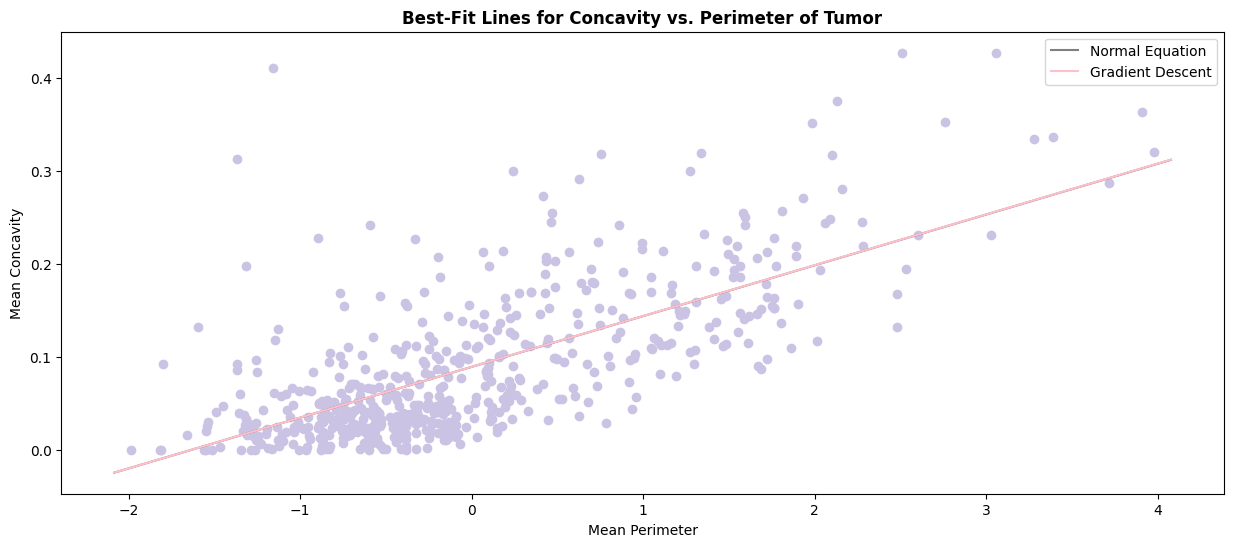

In [36]:
# Plotting mean perimeter and concavity with the best-fit line
x = np.linspace(cancer_perimeter_normal.min() - 0.1, cancer_perimeter_normal.max() + 0.1, 100)
y_normal = coef_normal * x + int_normal
y_gd = coef_gd * x + int_gd
plt.figure(figsize = (15, 6))
plt.scatter(cancer_perimeter_normal, cancer_concavity, color = '#CBC3E3')  
plt.plot(x, y_normal, color = 'gray', label = 'Normal Equation')  
plt.plot(x, y_gd, color = 'pink', label = 'Gradient Descent') 
plt.title("Best-Fit Lines for Concavity vs. Perimeter of Tumor", fontweight = 'bold')
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Concavity")
plt.legend()
plt.show()

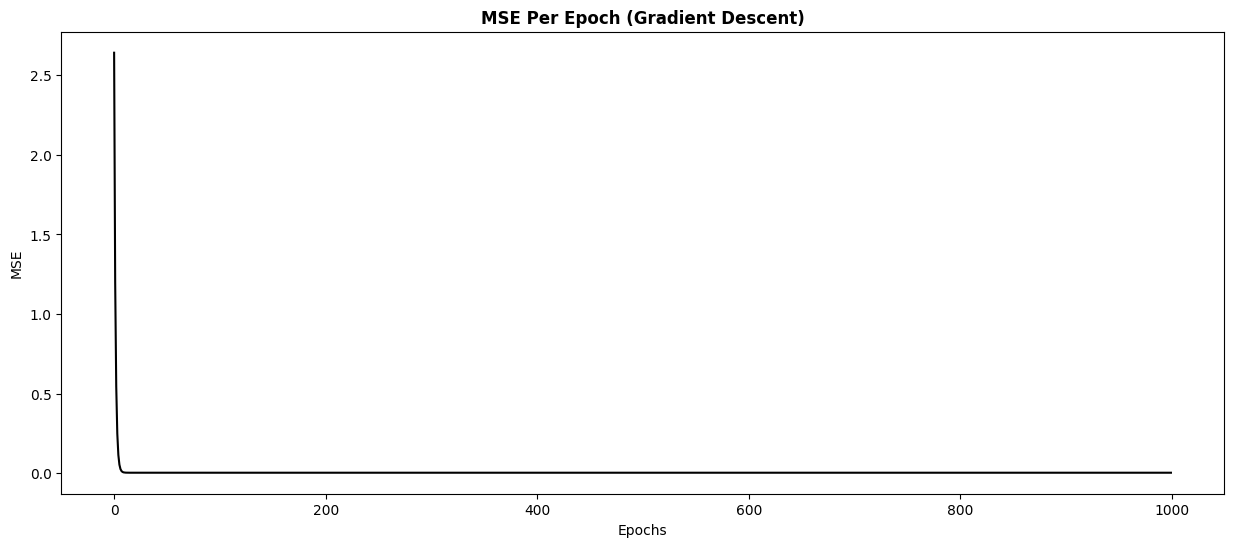

In [37]:
# Plotting mean perimeter and concavity with the best-fit line
error = reg_gd.error_
epochs = np.arange(reg_gd.epochs)
plt.figure(figsize = (15, 6))
plt.plot(epochs, error, color = 'black')  
plt.title("MSE Per Epoch (Gradient Descent)", fontweight = 'bold')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [38]:
# Evaluating the model for the normal equation
print_model_metrics(prediction_normal, test_targets, n_features = 1)

Model Metrics 
------------- 
MAE: 0.04 
MSE: 0.00 
RMSE: 0.05 
R2: 0.59 
Adjusted R2: 0.59


In [39]:
# Evaluating the model for the normal equation
print_model_metrics(prediction_gd, test_targets, n_features = 1)

Model Metrics 
------------- 
MAE: 0.04 
MSE: 0.00 
RMSE: 0.05 
R2: 0.59 
Adjusted R2: 0.59


The **model is not a good predictor of concavity - explain - normal and gradient descent perform very similarly**.

### Linear Regression Implementation (Changing Parameters)

This section **implements a basic linear regression algorithm with different parameters**. It has already been shown that the results obtained from the normal equation and from gradient descent are approximately equivalent, so **we will use gradient descent/tune the parameters for that**

In [40]:
# Arrays for maximum epochs and R2
epoch_values = np.arange(1, 1050, 50)
r2_epochs = np.full(len(epoch_values), np.nan)

# Fitting and scoring the model for each set of epochs
for i in range(len(epoch_values)):
    reg = linear_regression('gradient_descent', epochs = int(epoch_values[i]), learning_rate = 0.001)
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    r2_score = reg.scoring(test_array, test_targets)
    r2_epochs[i] = r2_score

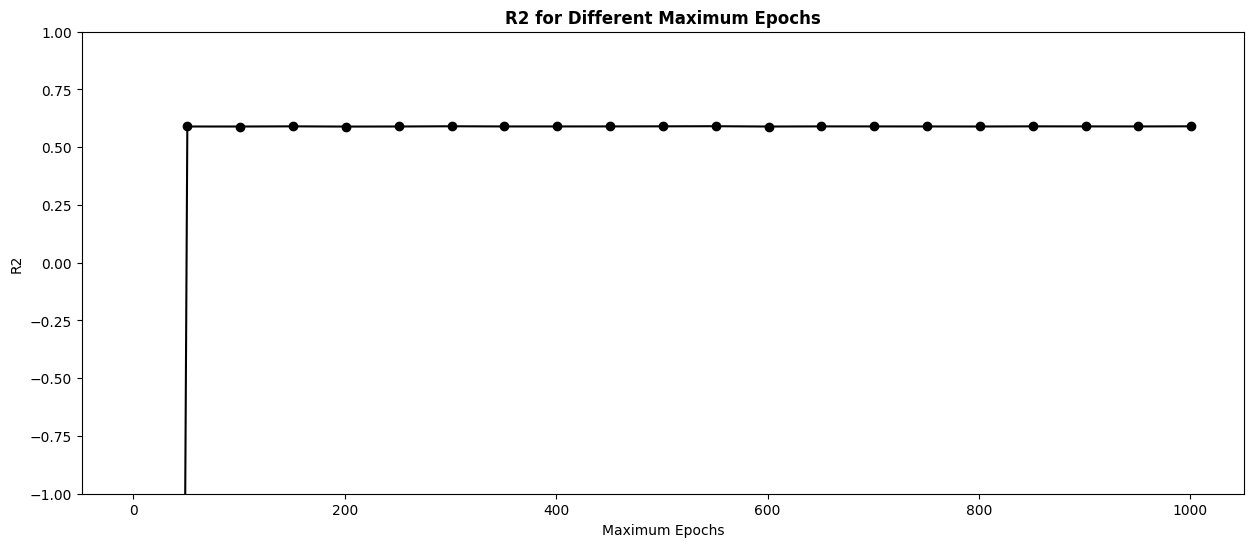

In [41]:
# Plotting the change in R2 across different maximum epochs
plt.figure(figsize = (15, 6))
plt.plot(epoch_values, r2_epochs, 'black')
plt.scatter(epoch_values, r2_epochs, color = 'black')
plt.title("R2 for Different Maximum Epochs", fontweight = 'bold')
plt.xlabel("Maximum Epochs")
plt.ylabel("R2")
plt.ylim(-1, 1)
plt.show()

**Interpretation = 100 is fine, does not change much with more epochs**

In [42]:
# Arrays for learning rate and accuracy
learning_rate_values = np.linspace(0.001, 0.50, 20)
r2_learning_rate = np.full(len(learning_rate_values), np.nan)

# Fitting and scoring the model for each learning rate
for i in range(len(learning_rate_values)):
    reg = linear_regression('gradient_descent', epochs = 100, learning_rate = learning_rate_values[i])
    reg.fit(train_array, train_targets)
    prediction = reg.prediction(test_array)
    r2_score = reg.scoring(test_array, test_targets)
    r2_learning_rate[i] = r2_score

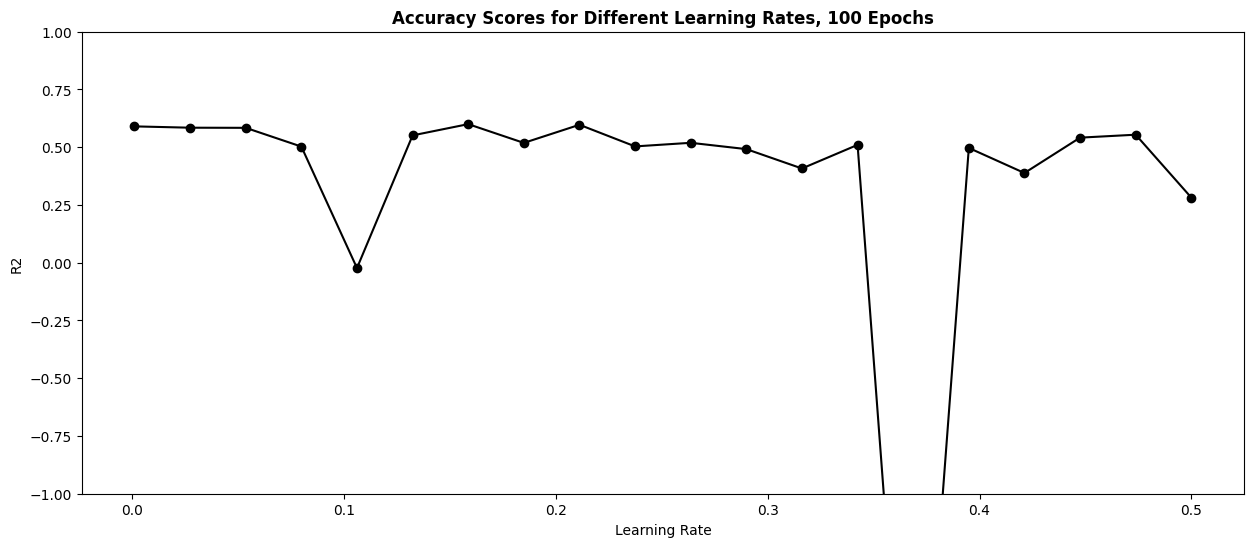

In [43]:
# Plotting the change in R2 across different learning rates
plt.figure(figsize = (15, 6))
plt.plot(learning_rate_values, r2_learning_rate, 'black')
plt.scatter(learning_rate_values, r2_learning_rate, color = 'black')
plt.title("Accuracy Scores for Different Learning Rates, 100 Epochs", fontweight = 'bold')
plt.xlabel("Learning Rate")
plt.ylabel("R2")
plt.ylim(-1, 1)
plt.show()

**interpretation - higher the learning rate, not sufficient epochs to converge and lower R2**

### Linear Regression Implementation (Multiple Features)

**this section implements linear regression in the same way using multiple features to see if it improves model accuracy/works**. As before, we begin by standardizing all features and splitting the data into training and test sets, then **initializing/fitting a model**. **It will only use the first set of features**

In [44]:
# Standardizing the data
cancer_data_normal_mult = z_score_standardize(cancer_data_cleaned[:, [0, 1, 2, 3, 4, 5, 7, 8, 9]])
print(f"Standardized feature data (first five rows, first five features): \n {cancer_data_normal_mult[0:5, 0:5]}")

Standardized feature data (first five rows, first five features): 
 [[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]


In [45]:
# Splitting the data into training and testing arrays
train_array_mult, test_array_mult, train_targets_mult, test_targets_mult = train_test(cancer_data_normal_mult, cancer_concavity)

# Verifying sizes of each array
print(f"Shape of training array: {train_array_mult.shape}")
print(f"Shape of training targets: {train_targets_mult.shape}")
print(f"Shape of testing array: {test_array_mult.shape}")
print(f"Shape of testing targets: {test_targets_mult.shape}")

Shape of training array: (398, 9)
Shape of training targets: (398,)
Shape of testing array: (171, 9)
Shape of testing targets: (171,)


In [53]:
# Fitting the model
reg_mult = linear_regression('gradient_descent', epochs = 1000, learning_rate = 0.01)
reg_mult.fit(train_array_mult, train_targets_mult)

# Predicting tumor type based on testing data
prediction_mult = reg_mult.prediction(test_array_mult)

In [54]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_mult, test_targets_mult, n_features = 9)

Model Metrics 
------------- 
MAE: 0.02 
MSE: 0.00 
RMSE: 0.03 
R2: 0.88 
Adjusted R2: 0.87


**the model is much better with this amount of features**

### Comparison with Existing Models

**finish this!! scikit learn**

In [50]:
from sklearn.linear_model import LinearRegression
reg_sk = LinearRegression()
reg_sk.fit(train_array_mult, train_targets_mult)
prediction_sk = reg_sk.predict(test_array_mult)

In [51]:
# Evaluating model performance on various metrics
print_model_metrics(prediction_sk, test_targets_mult, n_features = 9)

Model Metrics 
------------- 
MAE: 0.01 
MSE: 0.00 
RMSE: 0.02 
R2: 0.93 
Adjusted R2: 0.93


**interpretation - pretty similar**